# Elastic Transformation of Image
from https://gist.github.com/erniejunior/601cdf56d2b424757de5

<class 'list'>




unsorted


 ['DataSet/Image/1.png', 'DataSet/Image/10.png', 'DataSet/Image/100.png', 'DataSet/Image/101.png', 'DataSet/Image/102.png', 'DataSet/Image/103.png', 'DataSet/Image/104.png', 'DataSet/Image/105.png', 'DataSet/Image/106.png', 'DataSet/Image/107.png', 'DataSet/Image/108.png', 'DataSet/Image/109.png', 'DataSet/Image/11.png', 'DataSet/Image/110.png', 'DataSet/Image/111.png', 'DataSet/Image/112.png', 'DataSet/Image/113.png', 'DataSet/Image/114.png', 'DataSet/Image/115.png', 'DataSet/Image/116.png', 'DataSet/Image/118.png', 'DataSet/Image/119.png', 'DataSet/Image/12.png', 'DataSet/Image/120.png', 'DataSet/Image/121.png', 'DataSet/Image/122.png', 'DataSet/Image/123.png', 'DataSet/Image/124.png', 'DataSet/Image/125.png', 'DataSet/Image/126.png', 'DataSet/Image/127.png', 'DataSet/Image/128.png', 'DataSet/Image/129.png', 'DataSet/Image/13.png', 'DataSet/Image/130.png', 'DataSet/Image/131.png', 'DataSet/Image/132.png', 'DataSet/Image/133.png', 'DataSet/Image/134.png',

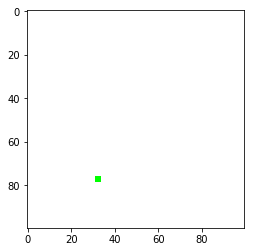

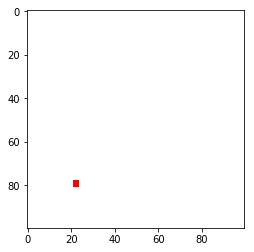

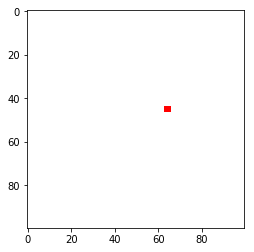

In [1]:
#Import images
%matplotlib inline
#read in 100 by 100 pixel images 
import os
import cv2
import numpy as np
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from natsort import natsorted
#np.set_printoptions(threshold=sys.maxsize)

filenames = [img for img in glob.glob("DataSet/Image/*.png")]

print(type(filenames))
print("\n\n\n\nunsorted\n\n\n", filenames)

filenames = natsorted(filenames)

print("\n\n\n\nsorted\n\n\n\n", filenames)

images = [cv2.imread(img) for img in filenames]

#check that we have 150 images
print("len images ", len(images))

#convert from BGR to RGB 
for img in images:
    img[np.where((img == [0, 0, 255]).all(axis=2))] = [255, 0, 0]

#plot first 3 images in dataset
for i in range(3):
    plt.imshow(images[i])
    plt.show()




In [2]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]))
    #print(x.shape)
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    distorted_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distorted_image.reshape(image.shape)

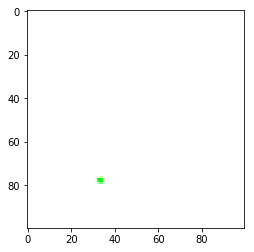

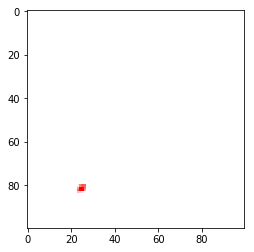

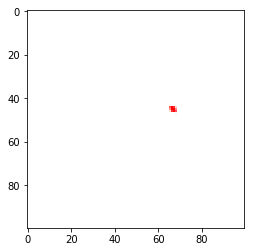

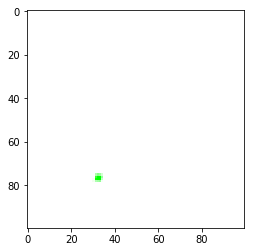

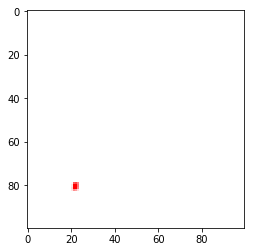

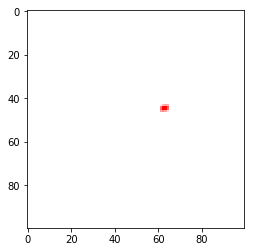

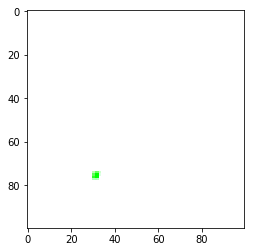

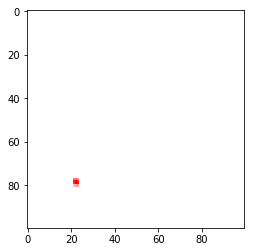

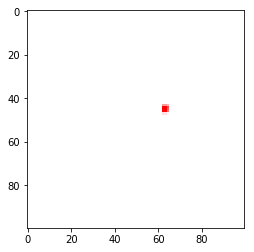

In [5]:
#ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))

alpha, alpha2, alpha3 = 991, 1501, 1201
sigma, sigma2, sigma3 = 8, 12, 10

distorted_imgs = []
distorted_imgs2 = []
distorted_imgs3 = []

for img in images: 
    distorted = elastic_transform(img, alpha=alpha, sigma=sigma)
    distorted_imgs.append(distorted)

for img in images: 
    distorted = elastic_transform(img, alpha=alpha2, sigma=sigma2)
    distorted_imgs2.append(distorted)

for img in images: 
    distorted = elastic_transform(img, alpha=alpha3, sigma=sigma3)
    distorted_imgs3.append(distorted)
    
#concatenate and save new dataset in folder
distorted_imgs = np.array(distorted_imgs)
distorted_imgs2 = np.array(distorted_imgs2)
distorted_imgs3 = np.array(distorted_imgs3)

#plot first 3 images in dataset
for i in range(3):
    plt.imshow(distorted_imgs[i])
    plt.show()

#plot first 3 images in dataset
for i in range(3):
    plt.imshow(distorted_imgs2[i])
    plt.show()

#plot first 3 images in dataset
for i in range(3):
    plt.imshow(distorted_imgs3[i])
    plt.show()

In [8]:
# save numpy arrays
from tempfile import TemporaryFile
import os

distorted1 = TemporaryFile()
np.save(os.path.join('DataSet/AugImages/distorted1', 'distorted1'), distorted_imgs)

distorted2 = TemporaryFile()
np.save(os.path.join('DataSet/AugImages/distorted2', 'distorted2'), distorted_imgs2)

distorted3 = TemporaryFile()
np.save(os.path.join('DataSet/AugImages/distorted3', 'distorted3'), distorted_imgs3)


In [4]:
#save new image dataset 
#make directory

import os
import cv2

mypath = "DataSet/AugImages"
if not os.path.isdir(mypath):
    for i in range(3):
        os.makedirs("DataSet/AugImages/distorted{}".format(i+1))


for i in range(len(distorted_imgs)):
    cv2.imwrite("DataSet/AugImages/distorted1/{}.png".format(i+1))

for i in range(len(distorted_imgs2)):
    cv2.imwrite("DataSet/AugImages/distorted2/{}.png".format(i+1))

for i in range(len(distorted_imgs3)):
    cv2.imwrite("DataSet/AugImages/distorted2/{}.png".format(i+1))




TypeError: Required argument 'img' (pos 2) not found